In [ ]:
# 콜렙에서 한글이 깨져서 나눔 폰트를 설치해보자.
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cashe -fv
!rm ~/.cache/matplotlib -rf
# 순서 : 마운트초기화 > 폰트설치 > 런타임다시시작 > 구글드라이브 마운트 > 나머지 코드...

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,851 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

In [ ]:
# 파일 기본 설정
# 수정 - 노트설정 tpu선택, 고용량ram 선택
# 우측 상단에 연결 클릭

# 파일 들어올때마다 재설치 해야하는데 한번만 설치하고 쓰면되게 하는 방법
import os, sys
from google.colab import drive
drive.mount('/content/drive')
# 콜랩은 기본이 리눅스 환경이다
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
경쟁사이용_df = pd.read_csv('/content/drive/MyDrive/1차프로젝트/data/경쟁사이용.txt',encoding='CP949')
고객DEMO_df = pd.read_csv('/content/drive/MyDrive/1차프로젝트/data/고객DEMO.txt',encoding='CP949')
멤버십_df = pd.read_csv('/content/drive/MyDrive/1차프로젝트/data/멤버십여부.txt',encoding='CP949')
상품분류_df = pd.read_csv('/content/drive/MyDrive/1차프로젝트/data/상품분류.txt',encoding='CP949')
채널이용_df = pd.read_csv('/content/drive/MyDrive/1차프로젝트/data/채널이용.txt',encoding='CP949')
구매상품_df = pd.read_csv('/content/drive/MyDrive/1차프로젝트/data/구매상품TR.txt',encoding='CP949')

In [ ]:
경쟁사이용_df

,고객번호,제휴사,경쟁사,이용년월
0,2,D,D02,201507
1,51,D,D01,201504
2,77,D,D02,201503
3,77,D,D02,201506
4,77,D,D02,201507
...,...,...,...,...
28154,19375,B,B01,201501
28155,19375,B,B01,201507
28156,19375,C,C03,201511
28157,19376,B,B01,201506


In [ ]:
고객당이용회수 = 경쟁사이용_df.고객번호.value_counts()
고객당이용회수

13260    40
5661     34
12804    34
3442     34
1871     33
         ..
3223      1
1126      1
1110      1
13392     1
13200     1
Name: 고객번호, Length: 5881, dtype: int64

In [ ]:
import pandas as pd
df = pd.DataFrame(고객당이용회수)
df1 = df.reset_index()
plt.rc('font', family='NanumBarunGothic') # 한글처리해주기위한거
df1.columns = ['고객번호', '이용횟수']
df1

,고객번호,이용횟수
0,13260,40
1,5661,34
2,12804,34
3,3442,34
4,1871,33
...,...,...
5876,3223,1
5877,1126,1
5878,1110,1
5879,13392,1


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


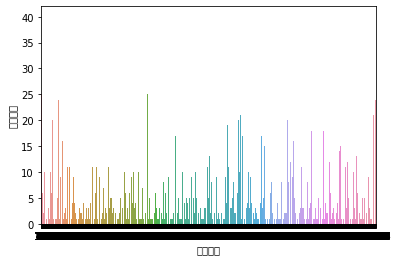

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.barplot(x='고객번호', y='이용횟수', data=df1, orient='v')

In [ ]:
고객DEMO_df

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.0
1,2,M,60세이상,100.0
2,3,M,60세이상,33.0
3,4,F,60세이상,16.0
4,5,M,60세이상,100.0
...,...,...,...,...
19378,19379,F,20세~24세,69.0
19379,19380,F,20세~24세,39.0
19380,19381,F,40세~44세,460.0
19381,19382,F,45세~49세,460.0


In [ ]:
# 타 데이터와 합치기 위해 1개씩만 있는지 확인
고객DEMO_df.value_counts()

고객번호   성별  연령대      거주지역 
19383  F   25세~29세  500.0    1
6429   F   40세~44세  49.0     1
6431   F   40세~44세  100.0    1
6432   F   40세~44세  610.0    1
6433   F   40세~44세  100.0    1
                            ..
12874  F   40세~44세  460.0    1
12875  F   40세~44세  100.0    1
12876  F   45세~49세  60.0     1
12877  F   50세~54세  210.0    1
1      M   60세이상    60.0     1
Length: 19205, dtype: int64

In [ ]:
멤버십_df

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


In [ ]:
상품분류_df

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,1,101,A010101,일용잡화,위생세제
1,A,1,101,A010102,일용잡화,휴지류
2,A,1,101,A010103,일용잡화,뷰티상품
3,A,1,101,A010104,일용잡화,일용잡화
4,A,1,101,A010105,일용잡화,세트상품
...,...,...,...,...,...,...
4381,D,8,802,D080204,아이메이크업,아이섀도우
4382,D,8,802,D080205,아이메이크업,메이크업세트
4383,D,8,803,D080301,립메이크업,립스틱/립라이너
4384,D,8,803,D080302,립메이크업,립글로즈/틴트


In [ ]:
채널이용_df

,고객번호,제휴사,이용횟수
0,7,A_MOBILE/APP,4
1,14,A_MOBILE/APP,1
2,42,B_MOBILE/APP,23
3,74,A_MOBILE/APP,1
4,74,B_MOBILE/APP,30
...,...,...,...
8819,19168,C_ONLINEMALL,18
8820,19291,C_ONLINEMALL,1
8821,19312,B_ONLINEMALL,137
8822,19351,C_ONLINEMALL,19


#### 고객번호로 데이터를 합칠 수 있는지 보기위해서 고객번호가 포함된 데이터 테이블을 점검
- 경쟁사이용_df
- 고객DEMO_df
- 멤버십_df
- 채널이용_df

In [ ]:
경쟁사이용_df.value_counts().max()

1

In [ ]:
files = [경쟁사이용_df, 고객DEMO_df, 멤버십_df, 채널이용_df]
for file in files:
    # print(str(file))
    print(file.고객번호.value_counts().max())
# #     print(j.고객번호.value_counts())
# 각 테이블당 겹체는 고객번호의 개수를 세봣더니 1개를 초과하고 각각의 파일마다 개수가 다른걸 봐서는 단순합치기는 불가상태

40
1
4
5


In [ ]:
구매상품_df

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000


In [ ]:
# 제휴사별 판매금액
구매상품_df.groupby('제휴사').구매금액.sum()

제휴사
A    514841144030
B    111221686478
C     50060970889
D       895355544
Name: 구매금액, dtype: int64

In [ ]:
t=구매상품_df.groupby('제휴사').구매금액.sum()
t[0]/(t.sum())
# A,B,C,D 순서대로 판매량이 높으며 A 제휴사가 전체 매출의 76%를 차지하고 있음

0.760452845021735

In [ ]:
# 가장 판매비중이 높은 A제휴사의 고객별 구매량을 탐색해보자
A_buy = 구매상품_df[구매상품_df.제휴사=='A'].groupby('고객번호').sum().sort_values(by = '구매금액', ascending = False)
# 총매출액 = A_buy.구매금액.sum()
A_buy['매출기여도(%)'] = np.round((A_buy.구매금액/A_buy.구매금액.sum())*100, 2)
A_buy

,영수증번호,대분류코드,중분류코드,점포코드,구매일자,구매시간,구매금액,매출기여도(%)
고객번호,,,,,,,,
15999,2818961977,2878,289792,9899,14928980276,11132,3570905490,0.69
14599,1856607205,1733,174587,3855,10032681505,7198,2639781570,0.51
16406,2358209820,1808,182541,8129,10981082721,8267,1880598580,0.37
8079,1345602450,1507,152381,5896,9447194065,7130,1487145090,0.29
6200,2224450559,1633,164818,5960,9812940712,7968,1251357380,0.24
...,...,...,...,...,...,...,...,...
7494,9031812,2,215,36,40301228,26,1800,0.00
16334,1226608,1,109,24,20140116,16,1520,0.00
17719,2936588,2,202,43,20141017,19,1500,0.00


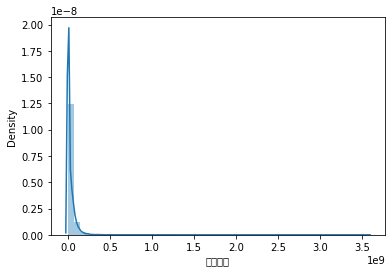

In [ ]:
# A사를 이용한 고객들의 구매금액을 시각화 해보면
sns.distplot(A_buy.구매금액)


In [ ]:
a_out = A_buy.reset_index()
a_out

,고객번호,영수증번호,대분류코드,중분류코드,점포코드,구매일자,구매시간,구매금액,매출기여도(%)
0,15999,2818961977,2878,289792,9899,14928980276,11132,3570905490,0.69
1,14599,1856607205,1733,174587,3855,10032681505,7198,2639781570,0.51
2,16406,2358209820,1808,182541,8129,10981082721,8267,1880598580,0.37
3,8079,1345602450,1507,152381,5896,9447194065,7130,1487145090,0.29
4,6200,2224450559,1633,164818,5960,9812940712,7968,1251357380,0.24
...,...,...,...,...,...,...,...,...,...
19150,7494,9031812,2,215,36,40301228,26,1800,0.00
19151,16334,1226608,1,109,24,20140116,16,1520,0.00
19152,17719,2936588,2,202,43,20141017,19,1500,0.00
19153,14562,1296509,1,109,11,20140128,12,1200,0.00


In [ ]:
sns.barplot(x='고객번호', y='구매금액', data=a_out, orient='v')
# 오래걸려서 일단 패스 10분쯤 기다려도 안나옴..

Error in callback <function flush_figures at 0x7fc18ce110e0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
# 고객데이터에 A제휴사에서 소비한 금액 추가
guest_atbuy = a_out.loc[:, ['고객번호', '구매금액']]
gst_abuy = pd.merge(고객DEMO_df, guest_atbuy ,on='고객번호', how='outer')
gst_abuy1 = gst_abuy.rename(columns={'구매금액':'A사구매금액'})
gst_abuy1

,고객번호,성별,연령대,거주지역,A사구매금액
0,1,M,60세이상,60.0,83227150.0
1,2,M,60세이상,100.0,99454850.0
2,3,M,60세이상,33.0,80000.0
3,4,F,60세이상,16.0,14274610.0
4,5,M,60세이상,100.0,13174220.0
...,...,...,...,...,...
19378,19379,F,20세~24세,69.0,2010020.0
19379,19380,F,20세~24세,39.0,52300.0
19380,19381,F,40세~44세,460.0,402600.0
19381,19382,F,45세~49세,460.0,175100.0


In [ ]:
B_buy = 구매상품_df[구매상품_df.제휴사=='B'].groupby('고객번호').sum()
B_buy = B_buy.reset_index()
guest_buy = B_buy.loc[:, ['고객번호', '구매금액']]
guest_buy

,고객번호,구매금액
0,1,790976
1,2,209450
2,3,6960
3,4,1594066
4,5,16000
...,...,...
18570,19379,300980
18571,19380,60280
18572,19381,5614579
18573,19382,4218683


In [ ]:
# B,C,D사에서도 구매한 금액을 합쳐보자
B_buy = 구매상품_df[구매상품_df.제휴사=='B'].groupby('고객번호').sum()
B_buy = B_buy.reset_index()
gst_abuy = pd.merge(gst_abuy1, B_buy.loc[:, ['고객번호', '구매금액']],on='고객번호', how='outer')
gst_totalbuy = gst_abuy.rename(columns={'구매금액':'B사구매금액'})

C_buy = 구매상품_df[구매상품_df.제휴사=='C'].groupby('고객번호').sum()
C_buy = C_buy.reset_index()
gst_totalbuy  = pd.merge(gst_totalbuy, C_buy.loc[:, ['고객번호', '구매금액']],on='고객번호', how='outer')
gst_totalbuy = gst_totalbuy.rename(columns={'구매금액':'C사구매금액'})

D_buy = 구매상품_df[구매상품_df.제휴사=='D'].groupby('고객번호').sum()
D_buy = D_buy.reset_index()
gst_totalbuy  = pd.merge(gst_totalbuy, D_buy.loc[:, ['고객번호', '구매금액']],on='고객번호', how='outer')
gst_totalbuy = gst_totalbuy.rename(columns={'구매금액':'D사구매금액'})

gst_totalbuy

,고객번호,성별,연령대,거주지역,A사구매금액,B사구매금액,C사구매금액,D사구매금액
0,1,M,60세이상,60.0,83227150.0,790976.0,1024424.0,NaN
1,2,M,60세이상,100.0,99454850.0,209450.0,NaN,216460.0
2,3,M,60세이상,33.0,80000.0,6960.0,3078207.0,NaN
3,4,F,60세이상,16.0,14274610.0,1594066.0,825134.0,NaN
4,5,M,60세이상,100.0,13174220.0,16000.0,NaN,46850.0
...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,69.0,2010020.0,300980.0,54570.0,3413710.0
19379,19380,F,20세~24세,39.0,52300.0,60280.0,146837.0,3653560.0
19380,19381,F,40세~44세,460.0,402600.0,5614579.0,23490.0,NaN
19381,19382,F,45세~49세,460.0,175100.0,4218683.0,7990.0,NaN


In [ ]:
# NAN값은 구매를 안한경우 이므로 0값으로 대체
gst_totalbuy.isnull().sum()

고객번호          0
성별            0
연령대           0
거주지역        178
A사구매금액      228
B사구매금액      808
C사구매금액     2273
D사구매금액    15592
dtype: int64

In [ ]:
# 구매금액의 널값은 0으로 대체하고 거주지역의 널값은 아직 고려해야할 사항이므로 유지
gst_totalbuy
df = gst_totalbuy.fillna(value=0)
df.거주지역 = gst_totalbuy.거주지역
df['총구매금액'] = df['A사구매금액']+df['B사구매금액']+df['C사구매금액']+df['D사구매금액']
df

,고객번호,성별,연령대,거주지역,A사구매금액,B사구매금액,C사구매금액,D사구매금액,총구매금액
0,1,M,60세이상,60.0,83227150.0,790976.0,1024424.0,0.0,85042550.0
1,2,M,60세이상,100.0,99454850.0,209450.0,0.0,216460.0,99880760.0
2,3,M,60세이상,33.0,80000.0,6960.0,3078207.0,0.0,3165167.0
3,4,F,60세이상,16.0,14274610.0,1594066.0,825134.0,0.0,16693810.0
4,5,M,60세이상,100.0,13174220.0,16000.0,0.0,46850.0,13237070.0
...,...,...,...,...,...,...,...,...,...
19378,19379,F,20세~24세,69.0,2010020.0,300980.0,54570.0,3413710.0,5779280.0
19379,19380,F,20세~24세,39.0,52300.0,60280.0,146837.0,3653560.0,3912977.0
19380,19381,F,40세~44세,460.0,402600.0,5614579.0,23490.0,0.0,6040669.0
19381,19382,F,45세~49세,460.0,175100.0,4218683.0,7990.0,0.0,4401773.0


In [ ]:
# 연령대별 제휴사 구매금액을 살펴보자
# 연령대별 구매기여도를 2가지 측면에서 볼 계획이다.
# 총액, 평균금액.
# 총액만 고려할 경우 연령대별 소비패턴을 파악하기 힘들고
# 평균 금액만 고려할 경우 특정 손님의 기여도 적용이 안됨.
df_sum = df.groupby('연령대').sum()
df_sum

,고객번호,거주지역,A사구매금액,B사구매금액,C사구매금액,D사구매금액,총구매금액
연령대,,,,,,,
19세이하,316740,3885.0,4.210309e+07,5.905673e+07,3.169517e+07,7738660.0,1.405936e+08
20세~24세,4780097,59625.0,2.667040e+09,7.265283e+08,3.565998e+08,179821740.0,3.929990e+09
25세~29세,10082411,143098.0,1.435640e+10,3.148662e+09,8.482458e+08,271674680.0,1.862498e+10
30세~34세,21642738,369513.0,3.866453e+10,8.395402e+09,3.941845e+09,125176780.0,5.112695e+10
35세~39세,31519704,626127.0,7.523299e+10,1.929665e+10,7.967039e+09,84386975.0,1.025811e+11
40세~44세,37173099,801509.0,9.033031e+10,2.329368e+10,1.055258e+10,82044939.0,1.242586e+11
45세~49세,37047029,827777.0,9.554607e+10,2.395104e+10,1.162069e+10,74199710.0,1.311920e+11
50세~54세,25389430,607576.0,8.408149e+10,1.737355e+10,8.974201e+09,34789290.0,1.104640e+11
55세~59세,11983828,322035.0,6.132841e+10,9.014291e+09,3.709480e+09,21244120.0,7.407343e+10


In [ ]:
plt.figure(figsize=(10,5))
그래프 = df_sum.reset_index()
plt.rc('font', family='NanumBarunGothic') # 한글처리해주기위한거
sns.barplot(x='연령대', y='총구매금액', data=그래프)

In [ ]:
df_mean = df.groupby('연령대').mean()
df_mean

,고객번호,거주지역,A사구매금액,B사구매금액,C사구매금액,D사구매금액,총구매금액
연령대,,,,,,,
19세이하,18631.764706,228.529412,2.476652e+06,3.473925e+06,1.864422e+06,455215.294118,8.270215e+06
20세~24세,16890.802120,215.252708,9.424171e+06,2.567238e+06,1.260070e+06,635412.508834,1.388689e+07
25세~29세,14718.848175,211.370753,2.095825e+07,4.596586e+06,1.238315e+06,396605.372263,2.718975e+07
30세~34세,12890.254914,221.663467,2.302831e+07,5.000240e+06,2.347734e+06,74554.365694,3.045084e+07
35세~39세,11383.063922,228.180394,2.716973e+07,6.968817e+06,2.877226e+06,30475.613940,3.704625e+07
40세~44세,10109.627142,219.411169,2.456631e+07,6.334967e+06,2.869889e+06,22313.010335,3.379347e+07
45세~49세,9075.705292,204.087032,2.340668e+07,5.867477e+06,2.846812e+06,18177.292994,3.213915e+07
50세~54세,8153.317277,197.072981,2.700112e+07,5.579175e+06,2.881888e+06,11171.897881,3.547336e+07
55세~59세,6755.258174,183.705077,3.457070e+07,5.081337e+06,2.091026e+06,11975.264938,4.175503e+07


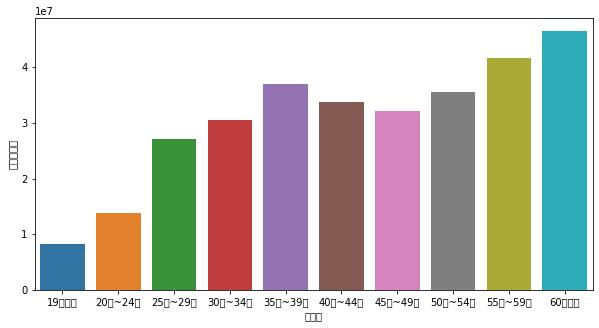

In [ ]:
plt.figure(figsize=(10,5))
그래프 = df_mean.reset_index()
plt.rc('font', family='NanumBarunGothic') # 한글처리해주기위한거
sns.barplot(x='연령대', y='총구매금액', data=그래프)